# Trabajo 1. Aprendizaje Automático I
# Jorge Pablo Ávila Gómez

## Datos
Los datos provienen de la web InsideAirBnB, dedicada al estudio de los alquileres vacacionales
ofrecidos en la plataforma AirBnB. El fichero es una versión editada, a fin de facilitar la tarea, del listado original
de información sobre las ofertas existentes, para la ciudad de Madrid, en abril de 2017. Contiene
**13321 registros con 11 campos cada uno**, correspondientes a diferentes características de cada
oferta de alojamiento.

La tarea de clasificación consiste en clasificar los datos según el tipo de alojamiento, definido
en el campo `room type`, a partir del resto de características.

## 1. Importar los datos y un primer estudio estadístico:

In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("airbnb.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13321 non-null  object 
 1   neighbourhood                   13321 non-null  object 
 2   latitude                        13321 non-null  float64
 3   longitude                       13321 non-null  float64
 4   room_type                       13321 non-null  object 
 5   price                           13321 non-null  int64  
 6   minimum_nights                  13321 non-null  int64  
 7   number_of_reviews               13321 non-null  int64  
 8   reviews_per_month               13321 non-null  float64
 9   calculated_host_listings_count  13321 non-null  int64  
 10  availability_365                13321 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


De aquí podemos observar ya algunas características importantes:
- Tenemos un dataset con un total de **11 columnas**
- con **13321 entradas**.
- Un dato muy importante es que no faltan datos en ninguna columna.
- Tenemos **3** variable de tipo `object` entre ellas la variable objetivo `room type` .
- El resto de variables (**8**) son **numéricas**.

In [2]:
## Podemos observar algunas filas del dataset
raw_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
2,Moncloa - Aravaca,Argüelles,40.424920,-3.713446,Entire home/apt,40,2,21,0.25,9,195
3,Moncloa - Aravaca,Casa de Campo,40.431027,-3.724586,Entire home/apt,55,2,3,0.13,9,334
4,Latina,Cármenes,40.403410,-3.740842,Private room,16,2,23,0.76,2,250


### 1.1 Estudio estadístico de las variables numéricas

In [3]:
raw_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,40.420730,-3.697268,69.171834,3.010885,22.986037,1.520329,7.605885,205.867202
std,0.020344,0.023832,103.721126,12.835619,38.406006,1.852367,19.619972,126.968961
min,40.331888,-3.863907,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.410090,-3.707856,31.000000,1.000000,1.000000,0.110000,1.000000,84.000000
50%,40.418731,-3.701602,53.000000,2.000000,7.000000,0.780000,2.000000,247.000000
75%,40.427997,-3.693818,80.000000,3.000000,28.000000,2.320000,4.000000,321.000000
max,40.562736,-3.526821,7700.000000,1125.000000,446.000000,17.210000,145.000000,365.000000


- Podemos observar de nuevo que no tenemos ``null values`` en las columnas numéricas, todas tiene 13321 valores.
- Es interesante que la columna ``price`` sean números enteros y el 50% de los valores entre 31 y 80, posiblemente sea el precio por noche.
- En la columna ``minimum_nights`` sorprende que el valor máximo sea 1125 que se corresponde con 1125/30/12 = 3 años, quizas es un poco raro para una oferta en airbnb. Habrá que estudiar los outliers. 

In [4]:
sum(raw_data.minimum_nights > 365)  # 1 year

1

Curiosamente solo hay una oferta que pide un mínimo de noches mayor que 1 año, es el caso específico que veíamos que pedia 3 años de alquiler.

In [5]:
raw_data[raw_data.minimum_nights > 365]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
705,Centro,Palacio,40.41707,-3.708815,Entire home/apt,62,1125,2,0.25,1,0


Observamos ahora los histogramas de las diferentes variables:

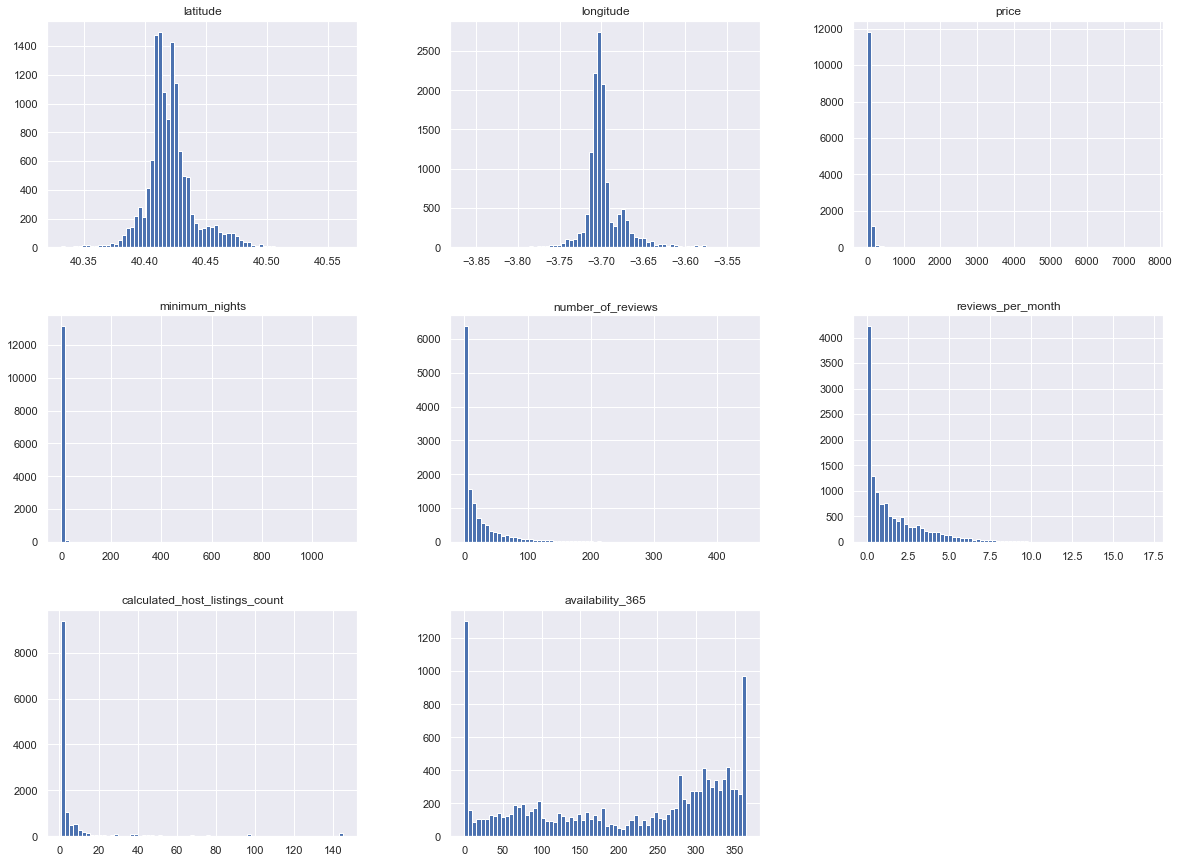

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

raw_data.hist(bins=70, figsize=(20, 15))
plt.show()

Aquí podemos observar que para variables como `price` o `minimum nights` la mayoría de los valores están cerca de 0. Habiendo valores muy lejanos de la mediana. Para `number of reviews`, `reviews per month` y `calculatred host listing count` las distribuciones son parecidas, pero con menos influencia de valores alejados. Por otro lado, `latitude` y `longitude` presentan distribuciones normales y la distribución de `availability 365` es aproximadamente uniforme.

En este estúdio no tenemos muchos valores diferentes (13321 no son demasiados) y tampoco una forma clara de comprobar si los valores atípicos son errores o tal vez, simplemente sean datos reales (es raro que en airBnB se pida 3 años de estancia mínima pero podría ser posible). He considerado usar todos los valores proporcionados en el dataset y utilizar las transformaciones adecuadas para disminuir la influencia de los outliers.

### 1.2 Estudio de las variables categóricas

neighbourhood_group
Number of categories: 21
Centro                   6773
Chamberí                  960
Salamanca                 883
Arganzuela                790
Tetuán                    463
Moncloa - Aravaca         450
Retiro                    439
Latina                    379
Chamartín                 361
Carabanchel               358
Ciudad Lineal             308
Puente de Vallecas        222
Hortaleza                 185
Fuencarral - El Pardo     170
Usera                     145
San Blas - Canillejas     117
Villaverde                 83
Barajas                    81
Moratalaz                  74
Villa de Vallecas          46
Vicálvaro                  34
Name: neighbourhood_group, dtype: int64


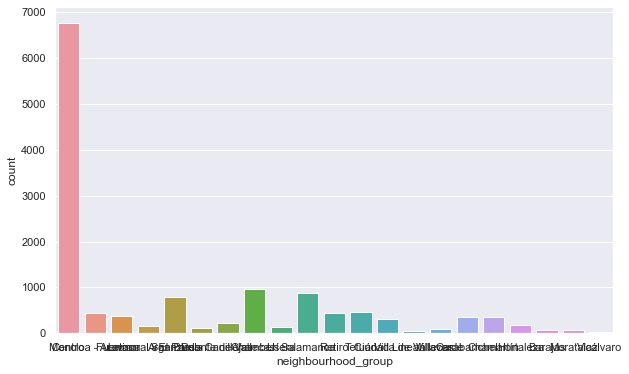

--------------------------------------------------
neighbourhood
Number of categories: 126
Embajadores       1848
Universidad       1363
Palacio           1084
Sol                942
Justicia           788
                  ... 
El Goloso            4
Santa Eugenia        4
Cuatro Vientos       3
Orcasitas            2
El Pardo             1
Name: neighbourhood, Length: 126, dtype: int64


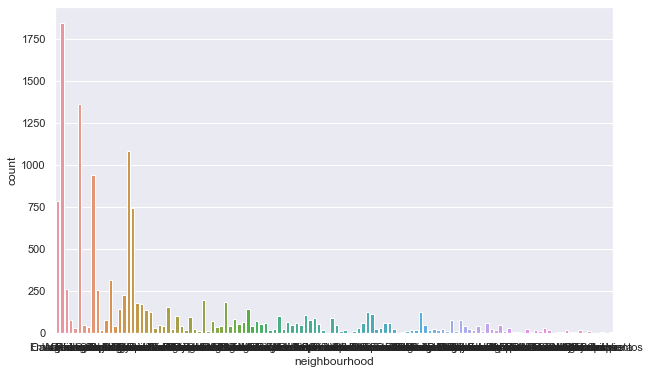

--------------------------------------------------
room_type
Number of categories: 3
Entire home/apt    7926
Private room       5203
Shared room         192
Name: room_type, dtype: int64


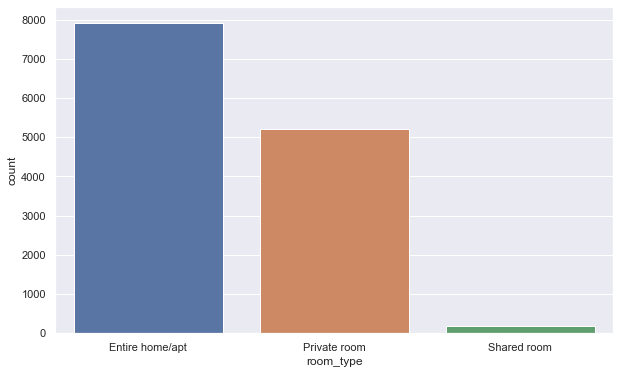

--------------------------------------------------


In [7]:
for col in raw_data.columns:
    if str(raw_data[col].dtypes) == "object":  # Only categorical columns
        print(col)
        print("Number of categories:", len(raw_data[col].unique()))
        print(raw_data[col].value_counts())  # The count of each different value

        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=col, data=raw_data)  # Count plot
        plt.show()
        print("-" * 50)

- Observamos que para la variable objetivo `room type` tenemos solo 3 categorias diferentes pero están desbalanceadas, especialmente la categoría `Shared room` con solo 192 casos.
- Para la variable `neighbourhood` tenemos muchas categorías, 126, para `neighbourhood_group` tenemos menos, solo 21. Estas dos variables estarán posiblemente muy relacionadas (cada `neighbourhood_group` estará formado por un conjunto de `neighbourhood`).  
- Del mismo modo, las variables `latitude` y `longitude` codifican también información de localización, posiblemente estando correlacionadas con las variables `neighbourhood` y `neighbourhood_group`.
- Por tanto, Se estudiará si es necesario incluir las variables categóricas `neighbourhood` y `neighbourhood_group` en los diferentes modelos.

### 1.3 Estudiar si faltan datos

In [8]:
# Checking for missing values
raw_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No falta ningún valor.

## 2. Preparación del test set con clases proporcionadas

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    raw_data, test_size=0.2, random_state=88, stratify=raw_data.room_type
)

- Se han dividido los datos en un `train_set` y un `test_set` del 20% de los datos. 
- Se ha realizadido una división estratificada según las clases de la columna objetivo `room type`. Así conseguimos que la distribución, no balanceada, de las clases se mantenga en el `train_set` y `test_set`, como podemos observar en las gráficas siguientes.

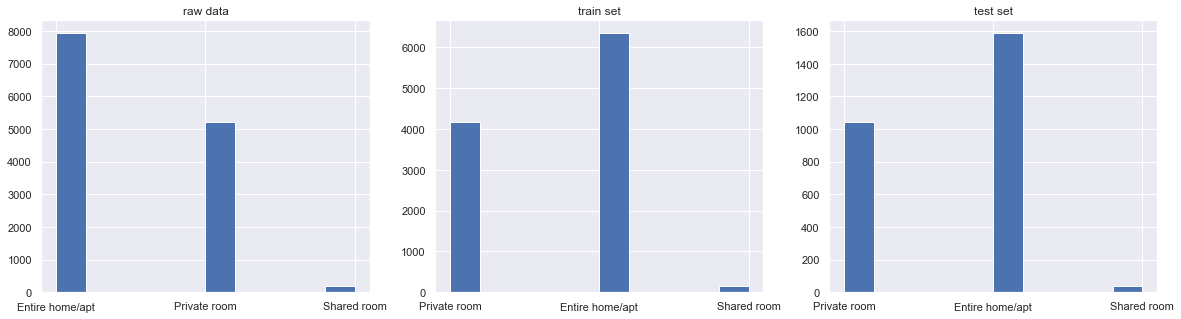

In [10]:
plt.subplot(131)
raw_data.room_type.hist(figsize=(20, 5))
plt.title("raw data")

plt.subplot(132)
train_set.room_type.hist()
plt.title("train set")

plt.subplot(133)
test_set.room_type.hist()
plt.title("test set")
plt.show()

## 3. Limpieza de los datos, transformación de datos categóricos y escalado de datos numéricos

En este apartado se han importado las funciones para el preprocesado y transformación de los datos.

Para los datos categóricos se va a usar la función `OneHotEncoder` que codifica las variables categóricas en columnas de ceros y unos para cada categoría.

Para los valores numéricos se va a usar la función `QuantileTransformer`. Esta función la vamos a usar para que nuestras variables sigan una distribución uniforme entre 0 y 1 usando como bases los cuantiles, de este modo se reduce la influencia de los valores atípicos. Esta transformación va a ser muy útil para el modelo `ComplementNB` que admite solo datos positivos y para el modelo `KNeighborsClassifier`, el cual es sensible a outliers y el preprocesado ayuda a mejorar los resultados.

Como observamos en las gráficas las variables numéricas presentan ahora una distribución más homogénea en todo el intervalo en comparación con los datos originales. 

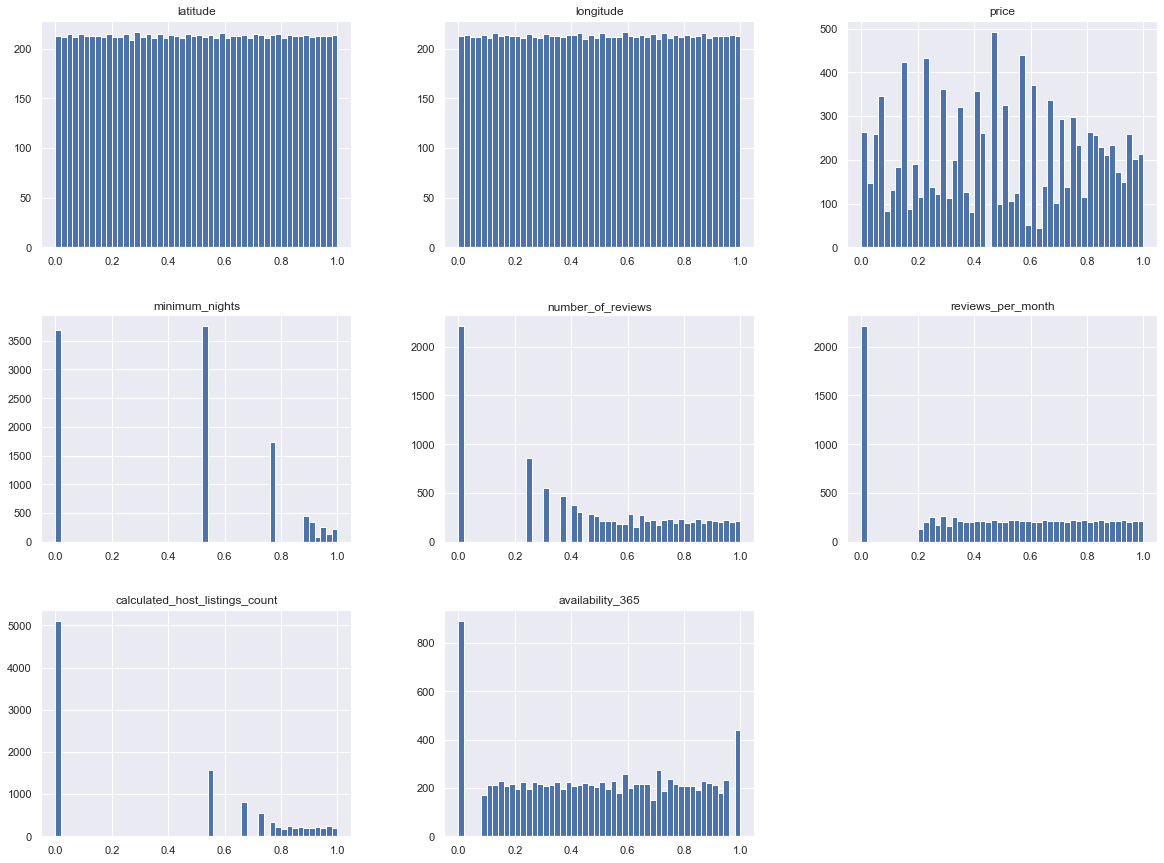

In [11]:
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type
# We prepare a ColumnTransoformer to see how the QuantileTransformer behaves
ct = ColumnTransformer(
    [
        ("num", QuantileTransformer(), make_column_selector(dtype_include=np.number)),
    ],
    remainder="drop",
)
X_train_t = ct.fit_transform(X_train)
X_train_t = pd.DataFrame(X_train_t, columns=X_train.columns[2:])
X_train_t.hist(bins=50, figsize=(20, 15))
plt.show()

## 4. Entrenamiento y validación 

En esta primera celda aparecen una serie de funciones que se usarán durante el entrenamiento y estudio de los diferentes modelos.

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# This function transforms a dataset using OneHotEncoder for the categorical variables
# and a transformer of your choice for the numerical ones.
# You can choose if the transformation is applied independently to the numerical or categorical variables.
# The non-transformed variables will be dropped by default.
def conf_transformer(
    transformer, X_train=X_train, num=True, cat=True, remainder="drop"
):
    trans = []
    if num:
        trans.append(
            ("num", transformer, make_column_selector(dtype_include=np.number))
        )
    if cat:
        trans.append(
            ("cat", OneHotEncoder(), make_column_selector(dtype_include=object))
        )
    ct = ColumnTransformer(
        trans,
        remainder=remainder,
    )

    X_train_t = ct.fit_transform(X_train)
    return X_train_t


# Calculate the CVScore using 10 folds and accuracy as the score.
# It returns the mean of the 10 folds.
def test_score_model(model, X_train_t):
    scores = cross_val_score(model, X_train_t, y_train, cv=10, scoring="accuracy")
    return scores.mean()


# Calculate the CV prediction of a model using 10 folds.
# The result is used to plot the confussion matrix.
def test_predict_model(model, X_train_t):
    scores = cross_val_predict(model, X_train_t, y_train, cv=10)
    return scores


# This function print the results and plot a confusion matrix.
def plot_result(results):
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 5))
    for i, res in enumerate(results):
        print(f"Model: {res[0]}")  # The model used in the training
        option = res[1]
        # If we used numerical features: 1 if not: 0
        # If we used categorical features: 1 if not: 0
        print(f"Num atributes: {option[0]} | Cat atributes: {option[1]}")
        print(f"Accuracy: {res[2]:.2f}")  # The obtained accuracy

        # It calculates the confusion matrix and normalize the values
        # so we know the fraction of the correct predictions
        # in this case it is important as the classes are imbalanced.
        cf_matrix = confusion_matrix(y_train, res[3])
        row_sums = cf_matrix.sum(axis=1, keepdims=True)
        norm_cf_matrix = cf_matrix / row_sums

        # Plot the confusion matrix
        axes[i].set_title(f"Num atributes: {option[0]} | Cat atributes: {option[1]}")
        sns.heatmap(
            norm_cf_matrix,
            ax=axes[i],
            square=True,
            annot=True,
            cbar=False,
            cmap="YlOrRd",
            xticklabels=y_train.unique(),
            yticklabels=y_train.unique(),
        )
        axes[i].set_xlabel("Predicted label")
        axes[0].set_ylabel("True label")

        print("---" * 20)

### 4.1 Clasificador Naive Bayes

Para Naives Bayes he usado el modelo `ComplementNB`. Este modelo es una variación de `MultinomialNB`, usa también una distribución multinomial pero, es específico para muestras no balanceadas como es nuestro caso.

He estudiado tres modelos diferentes, en uno entreno solo con las variables categóricas, en otro solo con las numéricas, y finalmente con todas las variables.
Para transformar las variables numéricas se ha usado `QuantileTransformer`.

Model: ComplementNB()
Num atributes: 0 | Cat atributes: 1
Accuracy: 0.63
------------------------------------------------------------
Model: ComplementNB()
Num atributes: 1 | Cat atributes: 0
Accuracy: 0.81
------------------------------------------------------------
Model: ComplementNB()
Num atributes: 1 | Cat atributes: 1
Accuracy: 0.67
------------------------------------------------------------


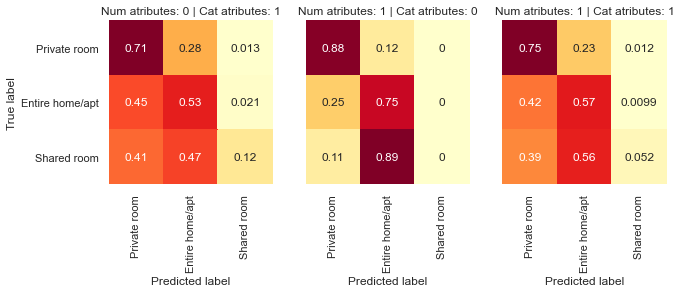

In [13]:
from sklearn.naive_bayes import ComplementNB

model_CNB = ComplementNB()
qt = QuantileTransformer()

# A list of the different configurations with or without some variables
options = [[i, j] for i in range(2) for j in range(2)]
options.remove([0, 0])  # Avoid training without any variable.

results = []
for opt in options:
    X_train_t = conf_transformer(qt, X_train, num=opt[0], cat=opt[1])
    results.append(
        [
            model_CNB,
            opt,
            test_score_model(model_CNB, X_train_t),
            test_predict_model(model_CNB, X_train_t),
        ]
    )

plot_result(results)

Para este modelo alcanzamos los mejores resultados si solo usamos las variables numéricas.

Sin embargo, observando la matriz de confusión, ninguno de los tres modelos es capaz de clasificar correctamente la categoría `Shared room` teniendo valores cercanos a ceros en la diagonal para esta categoría.

### 4.2 Clasificador  KNeighborsClassifier
Para K-Nearest-Neighbors he usado el modelo `KNeighborsClassifier`. Para este modelo no he encontrado en la documentación ningún parámetro que haga referencia al entrenamiento con clases no balanceadas.
Sin embargo el uso de KNN para clasificar clases no balanceadas es un problema ya que la clase mayoritaria, en proporción, es más probable encontrarla, y cuanto mayor sea el valor de K el modelo discriminará más a las clases pequeñas. Se puede encontrar información en la web sobre este problema por ejemplo: https://www.quora.com/Why-does-knn-get-effected-by-the-class-imbalance

He decidido estudiar por un lado un modelo usando los valores por defecto de `KNeighborsClassifier` y por otros lado usando `(n_neighbors=1)` que es la configuración a la que menos le afecta las clases desbalanceadas.
Para cada caso he estudiado tres modelos diferentes, en uno entreno solo con las variables categóricas, en otro solo con las numéricas, y finalmente con todas las variables.
Para transformar las variables numéricas se ha usado `QuantileTransformer`.

Model: KNeighborsClassifier()
Num atributes: 0 | Cat atributes: 1
Accuracy: 0.60
------------------------------------------------------------
Model: KNeighborsClassifier()
Num atributes: 1 | Cat atributes: 0
Accuracy: 0.89
------------------------------------------------------------
Model: KNeighborsClassifier()
Num atributes: 1 | Cat atributes: 1
Accuracy: 0.84
------------------------------------------------------------


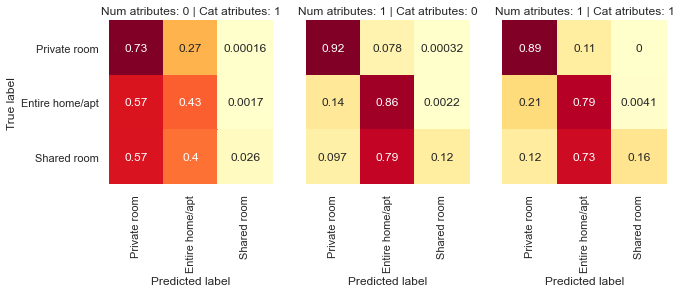

In [14]:
# KNeighborsClassifier n_neighbors: default=5

from sklearn.neighbors import KNeighborsClassifier

model_KNC = KNeighborsClassifier()
qt = QuantileTransformer()

# A list of the different configurations with or without some variables
options = [[i, j] for i in range(2) for j in range(2)]
options.remove([0, 0])  # Avoid training without any variable.

results = []
for opt in options:
    X_train_t = conf_transformer(qt, X_train, num=opt[0], cat=opt[1])
    results.append(
        [
            model_KNC,
            opt,
            test_score_model(model_KNC, X_train_t),
            test_predict_model(model_KNC, X_train_t),
        ]
    )

plot_result(results)

Model: KNeighborsClassifier(n_neighbors=1)
Num atributes: 0 | Cat atributes: 1
Accuracy: 0.54
------------------------------------------------------------
Model: KNeighborsClassifier(n_neighbors=1)
Num atributes: 1 | Cat atributes: 0
Accuracy: 0.86
------------------------------------------------------------
Model: KNeighborsClassifier(n_neighbors=1)
Num atributes: 1 | Cat atributes: 1
Accuracy: 0.83
------------------------------------------------------------


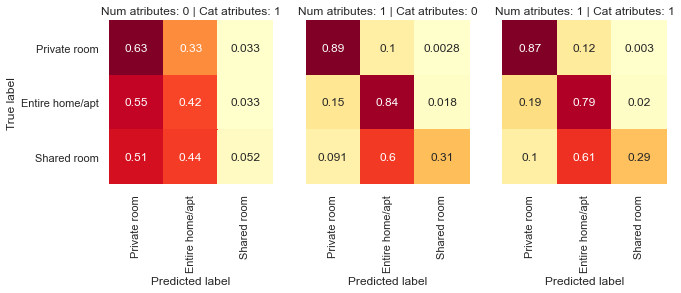

In [15]:
# KNeighborsClassifier n_neighbors: 1

from sklearn.neighbors import KNeighborsClassifier

model_KNC = KNeighborsClassifier(n_neighbors=1)
qt = QuantileTransformer()

# A list of the different configurations with or without some variables
options = [[i, j] for i in range(2) for j in range(2)]
options.remove([0, 0])  # Avoid training without any variable.

results = []
for opt in options:
    X_train_t = conf_transformer(qt, X_train, num=opt[0], cat=opt[1])
    results.append(
        [
            model_KNC,
            opt,
            test_score_model(model_KNC, X_train_t),
            test_predict_model(model_KNC, X_train_t),
        ]
    )

plot_result(results)

- Observamos que en los dos casos los modelos que incluyen las variables numéricas son los que mejor funcionan.
- La exactitud es ligeramente mayor para los modelos usando los parametros por defecto.
- Sin embargo, el modelo que usa solo 1 vecino es mucho mejor clasificando la etiqueta miniritaria `Shared Room` como habiamos previsto.

### 4.3 Clasificador DecisionTreeClassifier

Para estudiar los datos mediante Árboles de Decisión se ha usado el modelo `DecisionTreeClassifier`.
En la documentación de este modelo se indica que cuando se trabaja con clases no balanceadas se puede ajustar el parámetro `class_weight` a `"balanced"` para tener en cuenta las proporciones de cada clase en el ajuste.

- Se ha iniciado un modelo `DecisionTreeClassifier` usando `class_weight="balanced"`.
- No se transforman las variables numéricas, ya que los Árboles de Decisión no suelen necesitar escalar las variables.
- Como en los casos anteriores, se ha estudiado tres modelos diferentes, en uno se entrena solo con las variables categóricas, en otro solo con las numéricas, y finalmente con todas las variables. 

Model: DecisionTreeClassifier(class_weight='balanced')
Num atributes: 0 | Cat atributes: 1
Accuracy: 0.57
------------------------------------------------------------
Model: DecisionTreeClassifier(class_weight='balanced')
Num atributes: 1 | Cat atributes: 0
Accuracy: 0.85
------------------------------------------------------------
Model: DecisionTreeClassifier(class_weight='balanced')
Num atributes: 1 | Cat atributes: 1
Accuracy: 0.86
------------------------------------------------------------


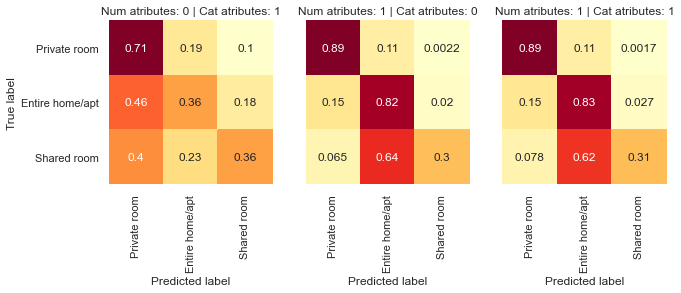

In [16]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(class_weight="balanced")

# A list of the different configurations with or without some variables
options = [[i, j] for i in range(2) for j in range(2)]
options.remove([0, 0])  # Avoid training without any variable.

results = []
for opt in options:
    # "passthrough" indicate we are not going to scale the num features
    X_train_t = conf_transformer("passthrough", X_train, num=opt[0], cat=opt[1])

    results.append(
        [
            model_DTC,
            opt,
            test_score_model(model_DTC, X_train_t),
            test_predict_model(model_DTC, X_train_t),
        ]
    )

plot_result(results)

- Los dos modelos que incluyen las variables numéricas son los que mejor funcionan, además presentan una exactitud idéntica y unas matrices de confusión muy parecidas. Esto parece indicar que las variables categóricas no añaden información relevante en estos casos.
- Para los clases `Private room` y `Entire home/apt` se obtienen unos valores entre 0.82 y 0.89 en la matriz de confusión los cuales son unos valores buenos, relativamente altos. Por otro lado `Shared room` alcanza unos valores cercanos al 0.30, y vemos que esta etiqueta se confunde principalmente con `Entire home/apt`.

### 4.4 Comparación entre los tres modelos diferentes

- Con los 3 modelos se ha alcanzado una exactitud > 0.80.
- Sin embargo, Naive Bayes se comporta bastante mal asignando la etiqueta `Shared room`, con valores cercanos a cero en la matriz de confusión.
- En los tres casos la mayor fuente de confusión para la etiqueta `Shared room` es `Entire home/apt`.
- Por otro lado, ``KNeighborsClassifier`` usando ``k = 1`` y `DecisionTreeClassifier` son capaces de asignar mucho mejor la etiqueta `Shared room`, llegando a valores de 0.31 en la matriz de confusión.
- Por último, tanto `KNeighborsClassifier` como `DecisionTreeClassifier` se comporta de manera muy parecida con y sin variables categóricas. Lo cual no es del todo sorprendente ya que la información sobre la localización viene en gran medida codificada en las variables numéricas `Latitude` y `Longitude`.

## 5 Hiperparametrización

### 5.1 Hiperparámetros KNeighborsClassifier

Para la afinación de los hiperparámetros en KNN se va a calcular el valor óptimo para `"n_neighbors"` entre 1 y 30.
Afinar este parámetro puede ser complicado para este modelo porque como hemos visto no tenemos ninguna forma de tener en cuenta las clases desbalanceadas, y cuando mayor sea el número de vecinos es muy probable que se asigne peor las clases minoritarias.

Se van a estudiar dos modelos de `KNeighborsClassifier` uno usando todas las variables y otro usando solo las variables numéricas.

In [17]:
from sklearn.model_selection import GridSearchCV

qt = QuantileTransformer()
X_train_t = conf_transformer(
    qt, X_train, num=True, cat=True
)  # All the variable are used
param_grid = [{"n_neighbors": list(range(1, 10))}]  # range between 1 and 10

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True,
)

scores_gs_KNN = grid_search.fit(X_train_t, y_train)

Model: KNeighborsClassifier
Num atributes: 1 | Cat atributes: 1
Best parameters: {'n_neighbors': 3}
Accuracy: 0.84


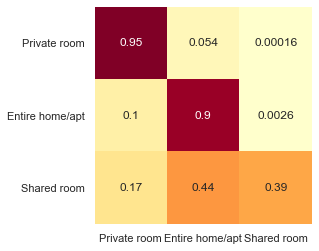

In [18]:
print("Model: KNeighborsClassifier")
print("Num atributes: 1 | Cat atributes: 1")  # All the variable are used
print(f"Best parameters: {scores_gs_KNN.best_params_}")  # Best parameters
print(f"Accuracy: {scores_gs_KNN.best_score_:0.2f}")  # Best accuracy

# A confusion matrix of the results
cf_matrix = confusion_matrix(y_train, scores_gs_KNN.predict(X_train_t))
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cf_matrix = cf_matrix / row_sums
sns.heatmap(
    norm_cf_matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap="YlOrRd",
    xticklabels=y_train.unique(),
    yticklabels=y_train.unique(),
)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

qt = QuantileTransformer()
X_train_t = conf_transformer(
    qt, X_train, num=True, cat=False
)  # Only numerical variables
param_grid = [{"n_neighbors": list(range(1, 30))}]  # range between 1 and 30

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True,
)

scores_gs_KNN_2 = grid_search.fit(X_train_t, y_train)

Model: KNeighborsClassifier
Num atributes: 1 | Cat atributes: 0
Best parameters: {'n_neighbors': 14}
Accuracy: 0.89


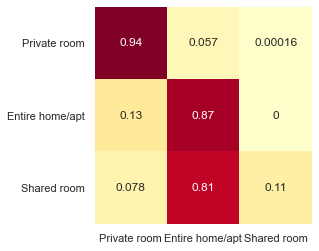

In [20]:
print("Model: KNeighborsClassifier")
print("Num atributes: 1 | Cat atributes: 0")  # Only numerical variables
print(f"Best parameters: {scores_gs_KNN_2.best_params_}")  # Best parameters
print(f"Accuracy: {scores_gs_KNN_2.best_score_:0.2f}")  # Best accuracy

# A confusion matrix of the results
cf_matrix = confusion_matrix(y_train, scores_gs_KNN_2.predict(X_train_t))
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cf_matrix = cf_matrix / row_sums
sns.heatmap(
    norm_cf_matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap="YlOrRd",
    xticklabels=y_train.unique(),
    yticklabels=y_train.unique(),
)
plt.show()

Se han obtenido resultados bastante diferentes para los dos modelos:
- El modelo que usa todas las variables alcanza una exactitud de 0.84 para `'n_neighbors': 3` mejorando los resultados obtenidos en el apartado anterior. En la matriz de confusión se llega a 0.39 para `Shared room` y valores >0.9 para las otras dos categorias.
- El modelo que usa solo las variables numéricas alcanza una exactitud de 0.89 para `'n_neighbors': 14`. Podría parecer que funciona mejor que el caso anterior pero vemos en la matriz de confusión que no es capaz de etiquetar correctamente la variable `Shared room`, siendo esta confundida en un 80% por la clase `Entire home/apt`. El modelo es capaz de clasificar muy bien las dos clases mayoritarias pero falla totalmente en clasificar la clase minoritaria, esto posiblemente sea debido a que el valor `'n_neighbors'` es demasiado alto y favorece la clasificación de las clases mayoritarias.

Para este problema preferimos el primer modelo con `'n_neighbors': 3` el cual es capaz de clasificar más homogeneamente las diferentes clases.

### 5.2 Hiperparámetros DecisionTreeClassifier

Para la afinación de los hiperparámetros en ``DecisionTreeClassifier`` se va a calcular los valores óptimos de `max_leaf_nodes` (entre 2 y 50), `min_samples_split` (entre 2 y 6) y `max_depth` (entre 1 y 20).

Al modelo base se le va a incluir el parámetro `class_weight="balanced"` para tener en cuenta las clases desbalanceadas.

Igual que en el apartado anterior, no se van a transformar las variables numéricas, y además, se va a entrenar con todas las variables.

In [21]:
from sklearn.model_selection import GridSearchCV

# All the variable are used, and the numerical without any transformation
X_train_t = conf_transformer("passthrough", X_train, num=True, cat=True)

# Parameters to be fit
param_grid = [
    {
        "max_leaf_nodes": [2, 5, 10, 20, 30, 40, 50],
        "min_samples_split": list(range(2, 6 + 1)),
        "max_depth": [1, 5, 10, 15, 20],
    }
]

grid_search = GridSearchCV(
    DecisionTreeClassifier(class_weight="balanced"),
    param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True,
)

scores_gs_DTC = grid_search.fit(X_train_t, y_train)

Model: DecisionTreeClassifier
Num atributes: 1 | Cat atributes: 1
Best parameters: {'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_split': 6}
Accuracy: 0.81


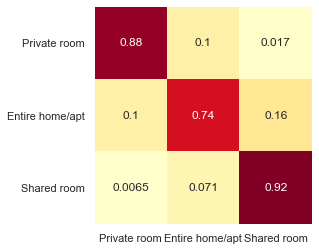

In [22]:
print("Model: DecisionTreeClassifier")
print("Num atributes: 1 | Cat atributes: 1")  # All the variable are used
print(f"Best parameters: {scores_gs_DTC.best_params_}")  # Best parameters
print(f"Accuracy: {scores_gs_DTC.best_score_:0.2f}")  # Best accuracy

# A confusion matrix of the results
X_train_t = conf_transformer("passthrough", X_train, num=True, cat=True)
cf_matrix = confusion_matrix(y_train, scores_gs_DTC.predict(X_train_t))
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cf_matrix = cf_matrix / row_sums
sns.heatmap(
    norm_cf_matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap="YlOrRd",
    xticklabels=y_train.unique(),
    yticklabels=y_train.unique(),
)
plt.show()

Los resultados de la hiperparametrización de este modelo son muy interesantes.
- Se ha optimizado el modelo para los parámetros ``{'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_split': 5}`` alcanzando una exactitud de 0.81
- Como se observa en la matriz de confusión se ha mejorado mucho el etiquetado de `Shared room` llegando a más de un 90% correctas. El mayor con diferencia de todos los modelos estudiados hasta ahora.
- Esta mejora en el etiquetado de `Shared room` viene con una disminución importante del porcentaje de etiquetado correcto en `Entire home/apt` que se queda en un 74%.

## 6. Evaluación del Test set

Se ha evaluado el test set en los dos modelos con mejores resultados después de la hiperparametrización:
- ``KNeighborsClassifier(n_neighbors=3)``
- ``DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=50, min_samples_split=5)``

Model: KNeighborsClassifier
Num atributes: 1 | Cat atributes: 1
Parameters: KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.84


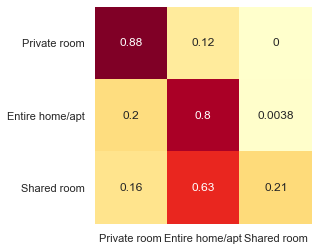

In [23]:
# Model: KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Preparation of X and y from the test_set
X_test = test_set.drop("room_type", axis=1)
y_test = test_set.room_type

# A column transformer with QuantileTransformer for the numeric variables
# and OneHotEncoder for the categorical variables
trans = [
    ("num", QuantileTransformer(), make_column_selector(dtype_include=np.number)),
    ("cat", OneHotEncoder(), make_column_selector(dtype_include=object)),
]
ct = ColumnTransformer(
    trans,
    remainder="drop",
)

# Transformation of the train and test X
X_train_t = ct.fit_transform(X_train)
X_test_t = ct.transform(X_test)

# Load the model from GridSearch
best_KNN = scores_gs_KNN.best_estimator_
# Fit the model
best_KNN.fit(X_train_t, y_train)
# Predict
y_pred = best_KNN.predict(X_test_t)

# Print the results
print("Model: KNeighborsClassifier")
print("Num atributes: 1 | Cat atributes: 1")  # All the variable are used
print(f"Parameters: {scores_gs_KNN.best_estimator_}")  # Parameters
print(f"Accuracy: {accuracy_score(y_test, y_pred):0.2f}")  # Accuracy

# A confusion matrix of the results
cf_matrix = confusion_matrix(y_test, y_pred)
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cf_matrix = cf_matrix / row_sums
sns.heatmap(
    norm_cf_matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap="YlOrRd",
    xticklabels=y_train.unique(),
    yticklabels=y_train.unique(),
)
plt.show()

- Presenta una exactitud de 0.84, igual que en validación cruzada tras la hiperparametrización.
- Con respecto a la matriz de confusión, presenta valores relativamente más bajos en la diagonal.

Model: DecisionTreeClassifier
Num atributes: 1 | Cat atributes: 1
Parameters: DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=50,
                       min_samples_split=6)
Accuracy: 0.82


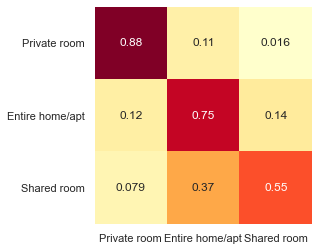

In [24]:
# Model: DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# A column transformer where the numeric variables are not transformed
# and OneHotEncoder for the categorical variables
trans = [
    ("num", "passthrough", make_column_selector(dtype_include=np.number)),
    ("cat", OneHotEncoder(), make_column_selector(dtype_include=object)),
]
ct = ColumnTransformer(
    trans,
    remainder="drop",
)

# Transformation of the train and test X
X_train_t = ct.fit_transform(X_train)
X_test_t = ct.transform(X_test)

# Load the model from GridSearch
best_DTC = scores_gs_DTC.best_estimator_
# Fit the model
best_DTC.fit(X_train_t, y_train)
# Predict
y_pred = best_DTC.predict(X_test_t)

# Print the results
print("Model: DecisionTreeClassifier")
print("Num atributes: 1 | Cat atributes: 1")  # All the variable are used
print(f"Parameters: {scores_gs_DTC.best_estimator_}")  # Parameters
print(f"Accuracy: {accuracy_score(y_test, y_pred):0.2f}")  # Accuracy

# A confusion matrix of the results
cf_matrix = confusion_matrix(y_test, y_pred)
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cf_matrix = cf_matrix / row_sums
sns.heatmap(
    norm_cf_matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap="YlOrRd",
    xticklabels=y_train.unique(),
    yticklabels=y_train.unique(),
)
plt.show()

- Presenta una exactitud de 0.82, un poco más alto (0.81) que en validación cruzada tras la hiperparametrización.
- Con respecto a la matriz de confusión, presenta valores muy parecidos para las clases `Private room` y `Entire home/apt` y para `Shared room` el valor de la diagonal baja a 0.55.

## 7. Conclusiones

Se han realizado un breve estudio estadístico de los datos proporcionados. El cual ha ayudado a entender las diferencias entre las variables y como deben tratarse. No se ha encontrado que falten valores, y al no conocer en profundidad los datos se ha preferido usar en el entrenamiento todos ellos y no eliminar ningún posible dato atípico.

Los datos han sido preprocesado cuando ha sido necesario para el entrenamiento, usando ``OneHotEncoder`` en las variables categóricas y ``QuantileTransformer`` para las numéricas.

Se han estudiado tres modelos diferentes (``ComplementNB``, ``KNeighborsClassifier`` y ``DecisionTreeClassifier``), y en cada uno de ellos se ha estudiado con y sin variables categóricas o numéricas. Los tres modelos han alcanzado unas puntuaciones de validación cruzada superiores a 0.8. Este valor indica una mejora con respecto a un modelo que clasifique solo a la clase mayoritaria `Entire home/apt` ~0.6 o en un modelo aleatorio ~0.3 (en realidad menos porque las clases no están balanceadas). Sin embargo, ``ComplementNB`` ha funcionado sustancialmente peor en particular clasificando la categoría `Shared Room`. Se ha observado también que las variables numéricas tienen una mayor importancia en el ajuste, posiblemente debido a que la información relacionada con la localización que ofrecen las variables categóricas ya se encuentra en gran medida codificada en las variables `latitude` y `longitude`.


También se ha estudiado la hiperparametrización de los modelos ``KNeighborsClassifier`` y ``DecisionTreeClassifier``. La exactitud de los modelos se ha mantenido en el rango de 0.80 - 0.85 pero se ha conseguido mejorar el perfil de la matriz de confusión, mejorando el porcentaje de etiquetado correcto a la clase minoritaria `Shared room`.

Tras la hiperparametrización se han evaluados los modelos ``KNeighborsClassifier`` y ``DecisionTreeClassifier`` usando el test set. En los dos casos se ha obtenido la misma exactitud que en los metodos de validación, lo cual nos indica que en principio no se ha producido overfitting. Con respecto a la matriz de confusión, el porcentaje de etiquedo correcto para `Shared room` ha disminuido con respecto a la validación cruzada. Posiblemente se deba al poco numero de valores para esta categoría lo cual ha dificultado su aprendizaje.